In [3]:
import cv2
import os

def extract_frames(video_path, output_folder):
    video_name = os.path.splitext(os.path.basename(video_path))[0]
    cap = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = os.path.join(output_folder, f"{video_name}_{frame_count:02d}.jpg")
        cv2.imwrite(frame_filename, frame)
        frame_count += 1
    cap.release()

def extract_frames_from_folder(folder_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(folder_path):
        if filename.endswith(('.mp4', '.avi', '.mov')):  # Add more video formats if needed
            video_path = os.path.join(folder_path, filename)
            extract_frames(video_path, output_folder)

if __name__ == '__main__':
    folder_path = '../datasets/event_20240405_18_06_48_fps1_clip_1_0/skeleton_act_recog_video'
    output_folder = '../datasets/event_20240405_18_06_48_fps1_clip_1_0/pose_img'
    extract_frames_from_folder(folder_path, output_folder)


In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

depth_images = sorted([f for f in os.listdir("../figma_pres_imgs/exp2/depth")])

video_path = "../figma_pres_imgs/exp2/depth_vidoe.mp4"
fourcc = cv2.VideoWriter_fourcc(*'avc1')
out = cv2.VideoWriter(video_path, fourcc, 10, (640, 480))

# Read the npz files and store the depth images in a list
for img in depth_images:
    file_path = os.path.join("../figma_pres_imgs/exp2/depth", img)
    data = np.load(file_path)
    depth_image = data['arr_0']  # Assuming the array is stored with the default key 'arr_0'

    min_value = depth_image.min()
    max_value = depth_image.max()
    normalized_array = ((depth_image - min_value) / (max_value - min_value)) * 255
    normalized_array_int = normalized_array.astype(np.uint8)

    # plt.imshow(normalized_array_int, cmap='gray')
    # plt.show()
    # break

    out.write(normalized_array_int)

out.release()

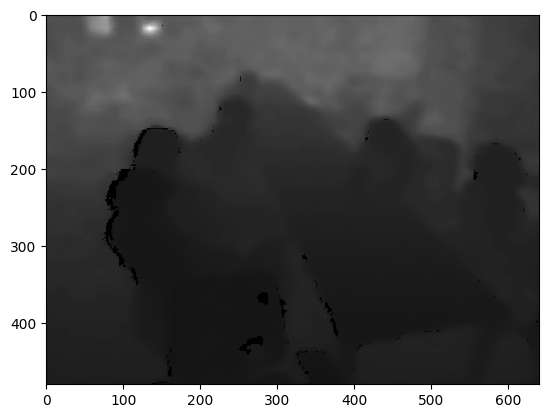

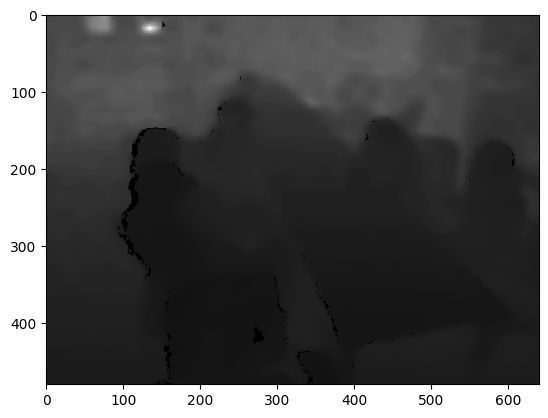

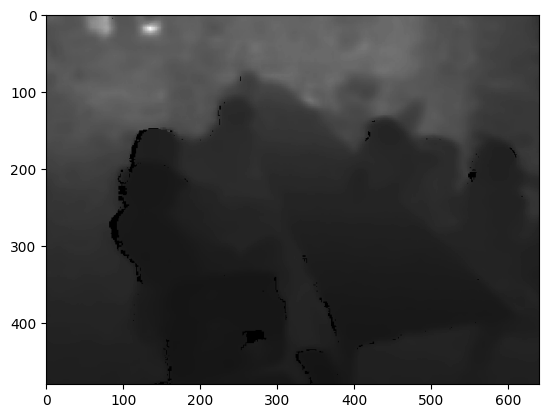

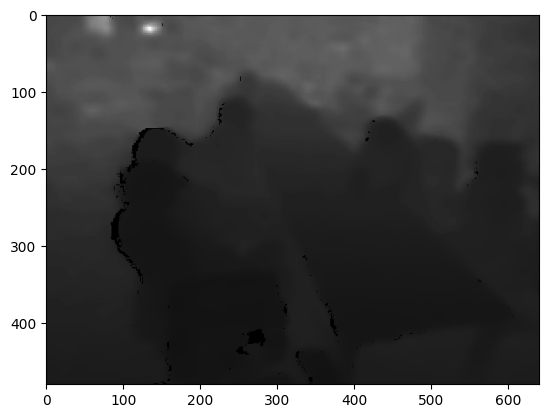

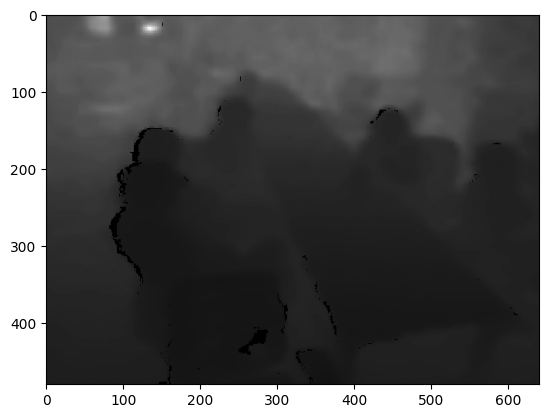

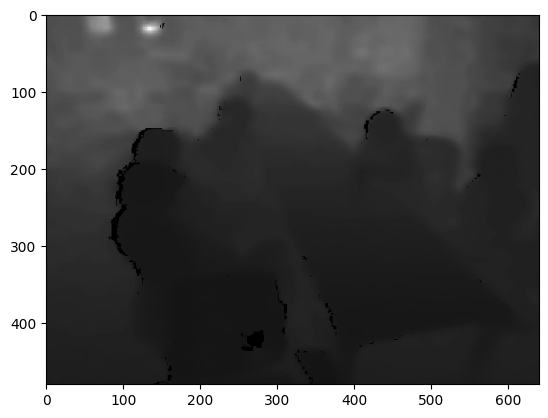

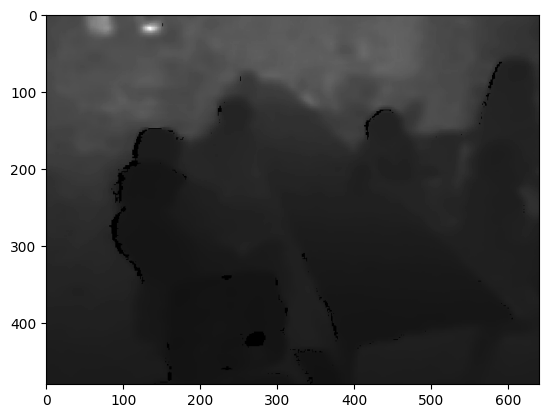

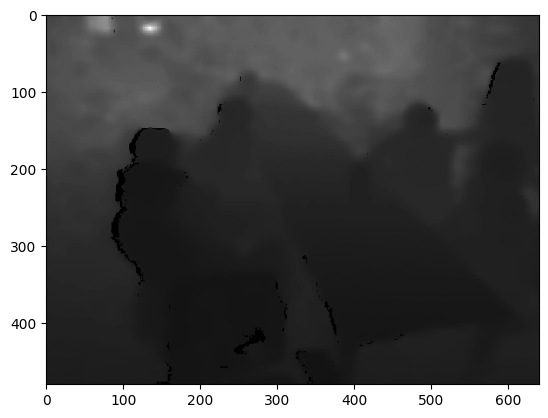

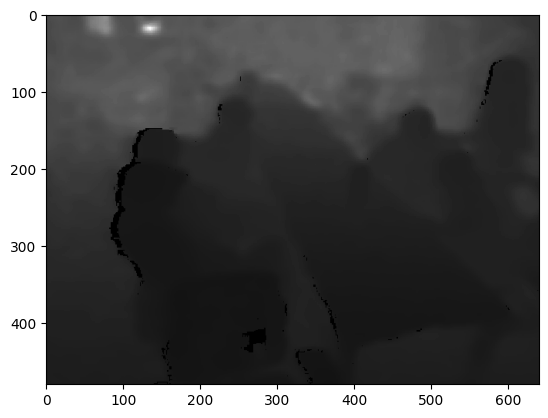

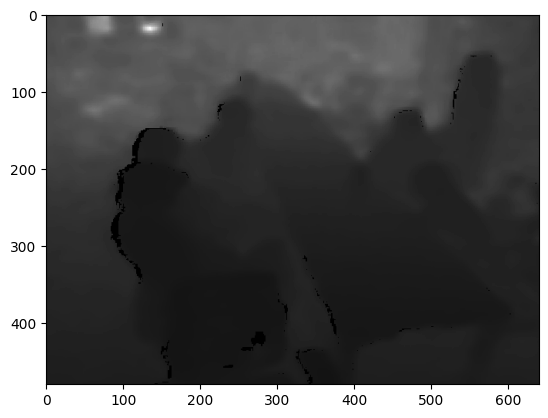

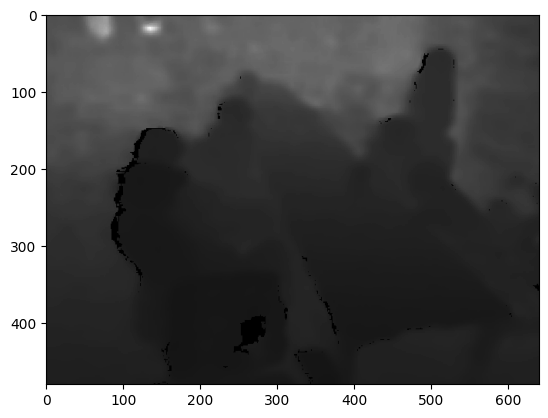

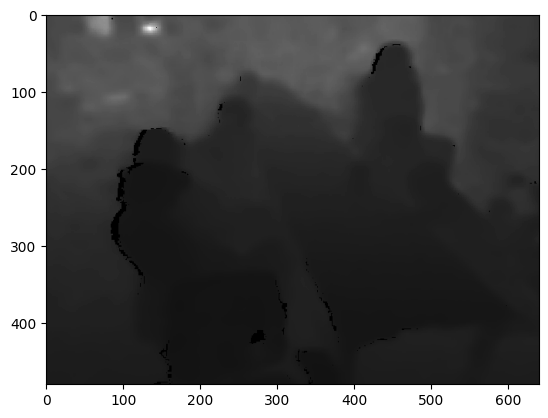

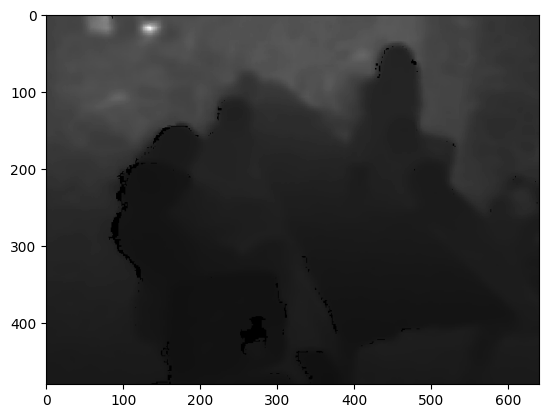

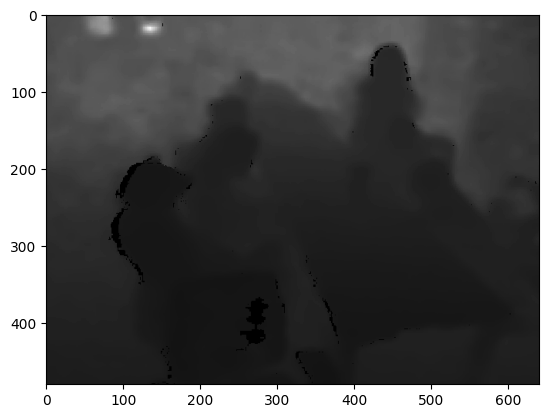

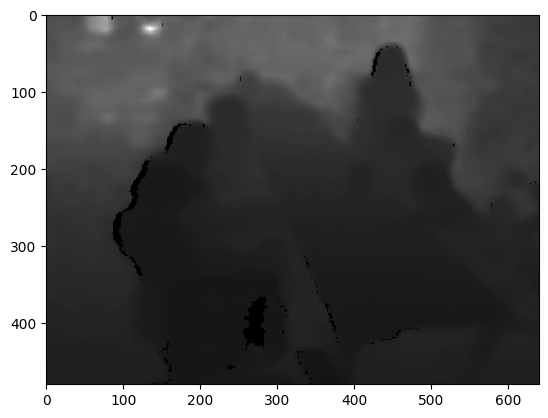

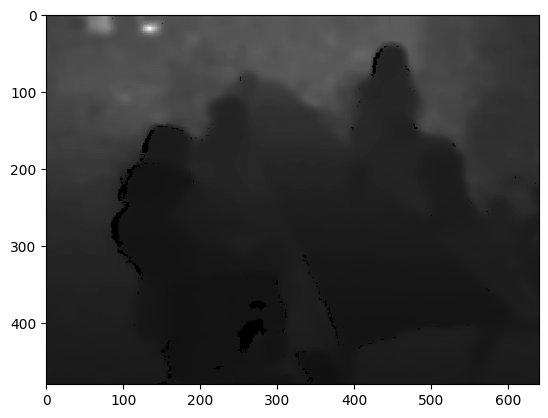

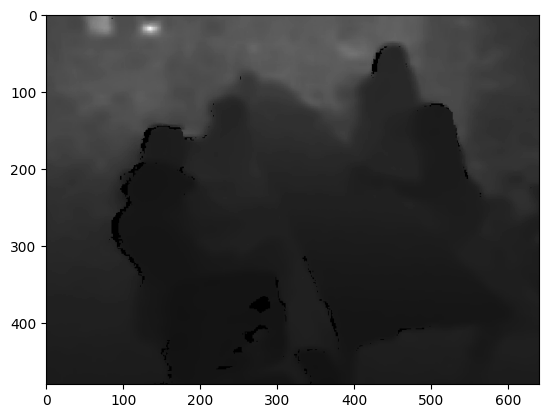

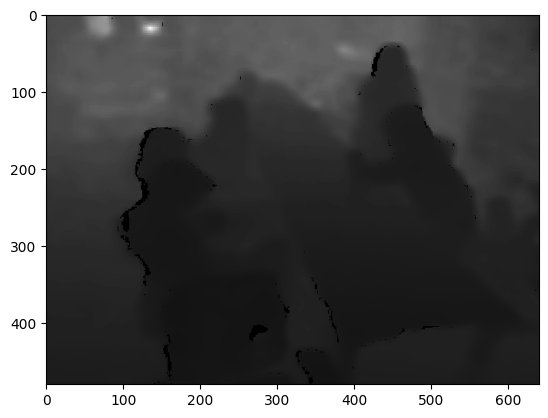

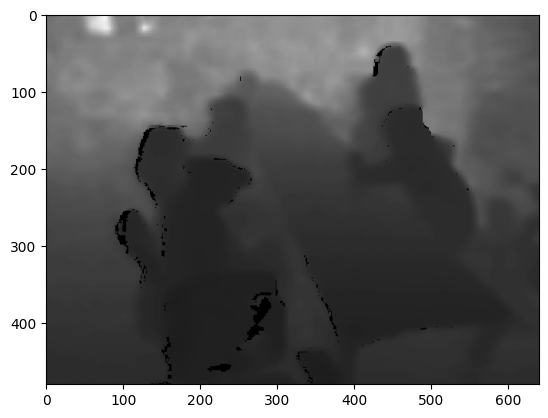

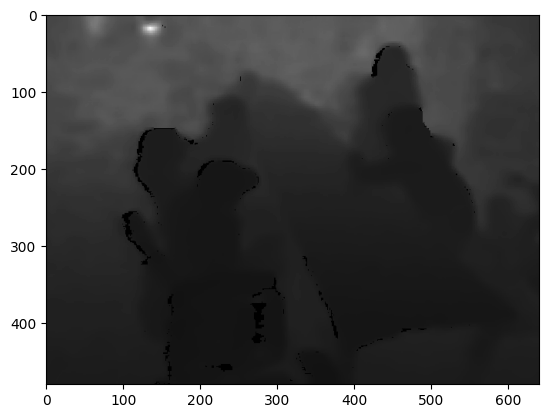

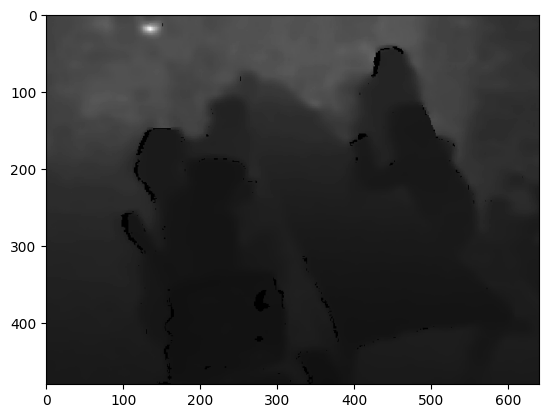

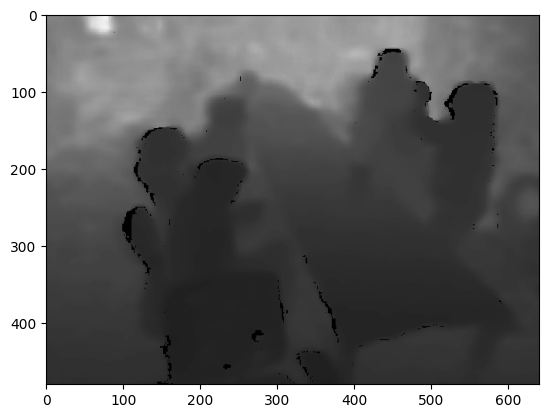

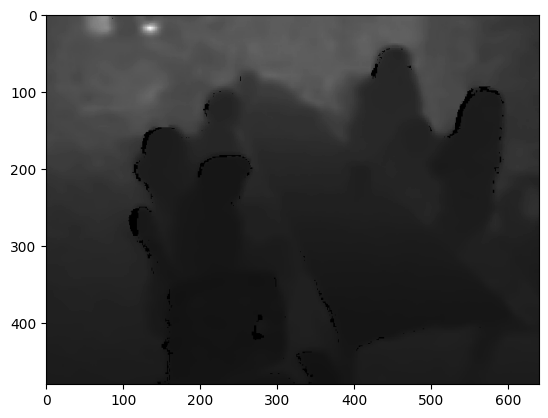

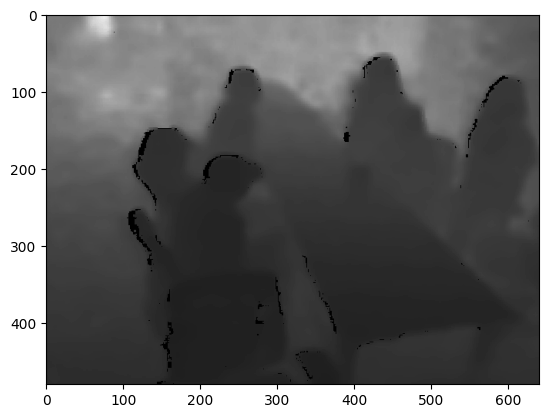

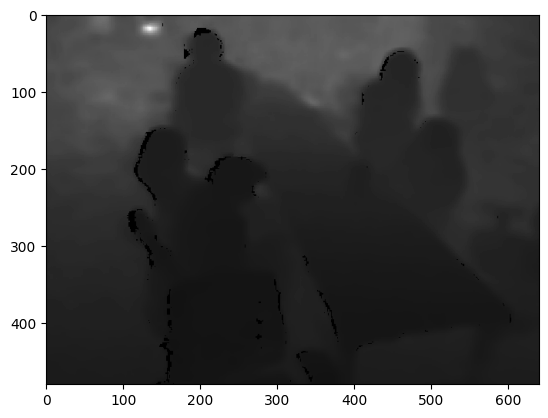

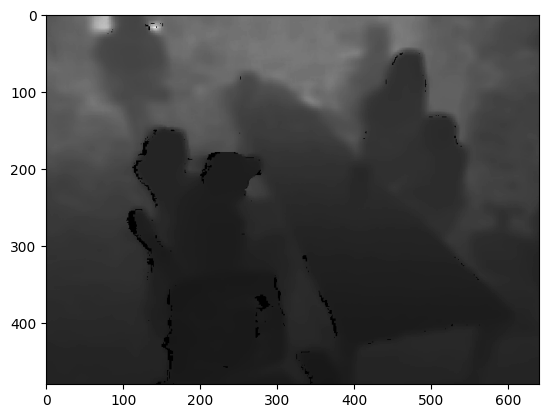

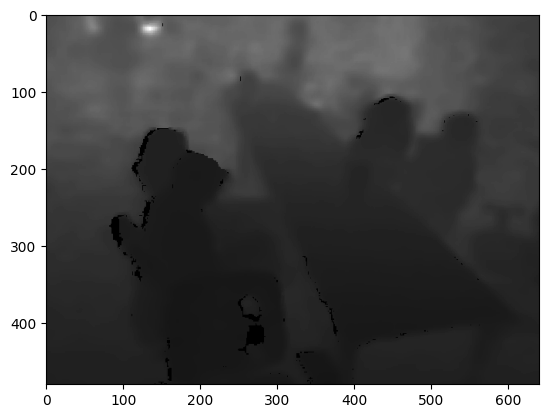

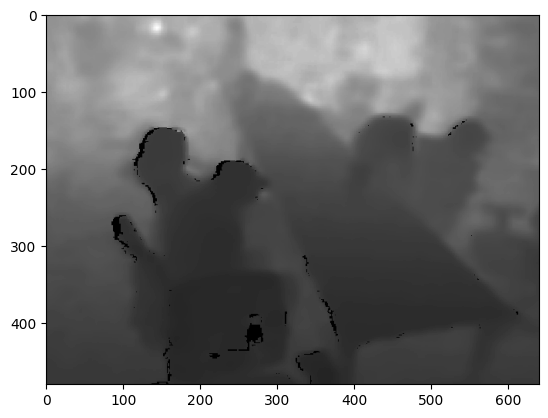

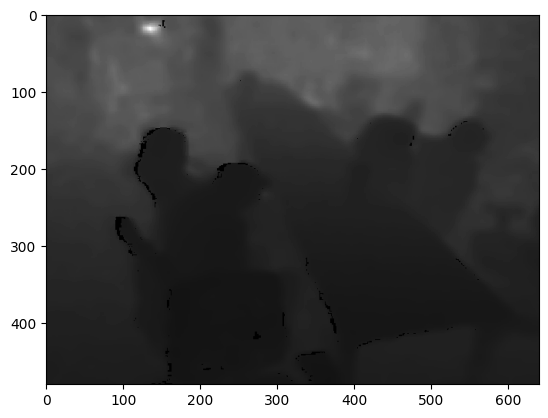

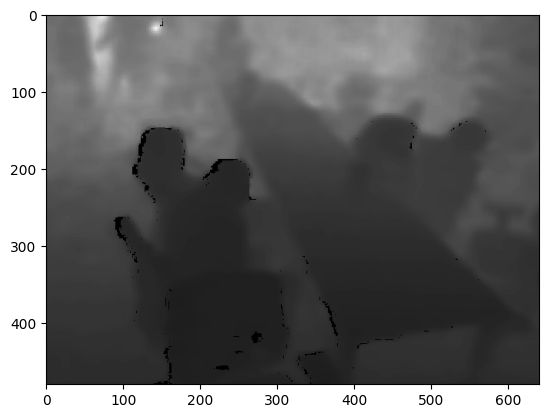

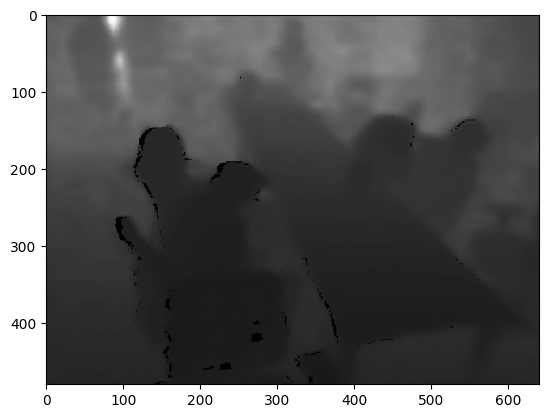

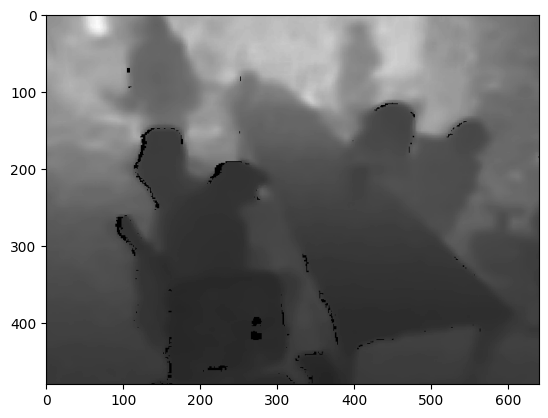

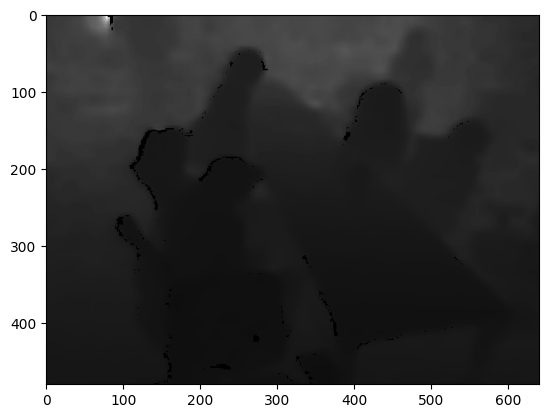

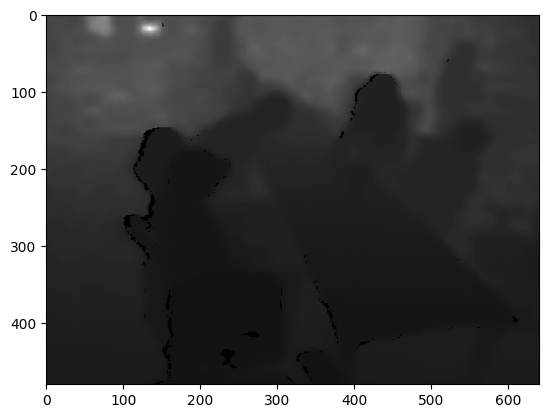

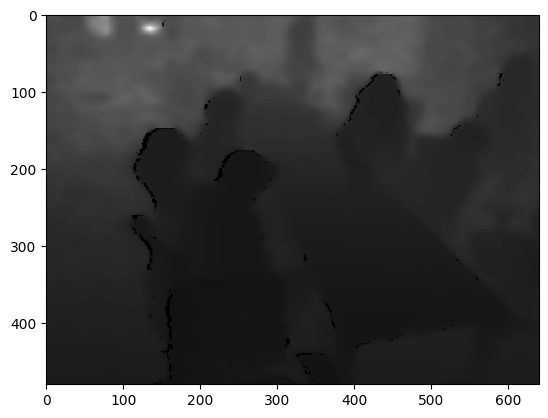

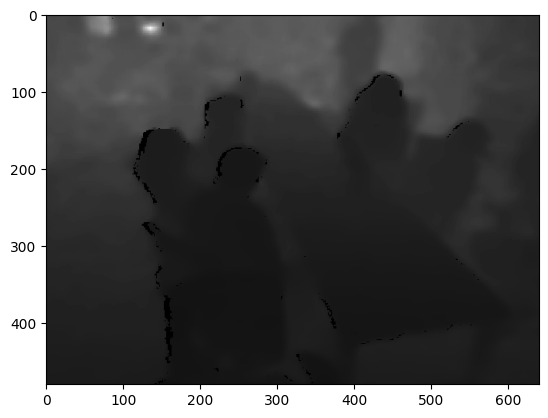

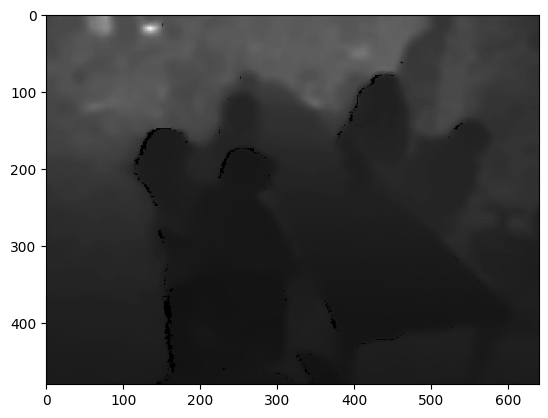

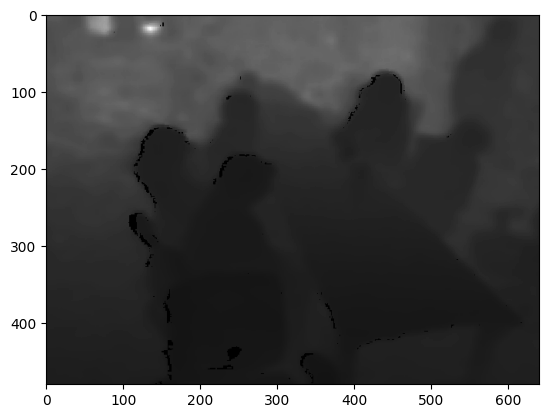

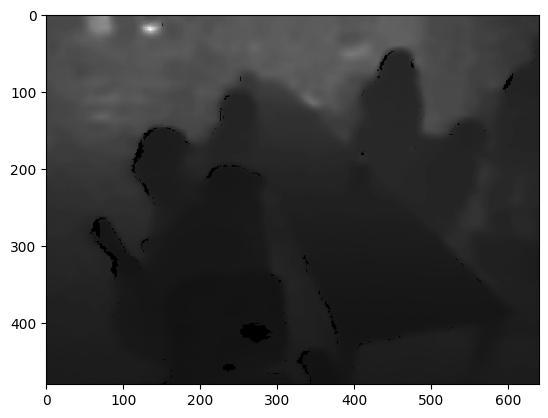

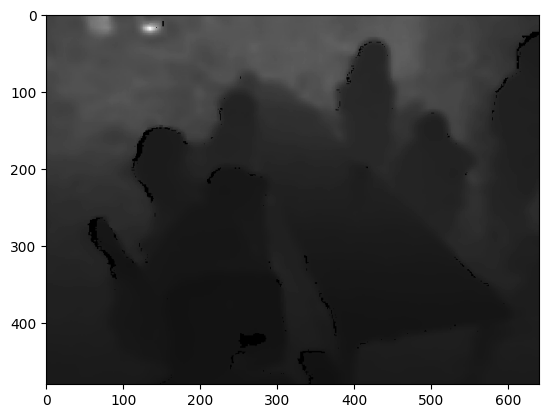

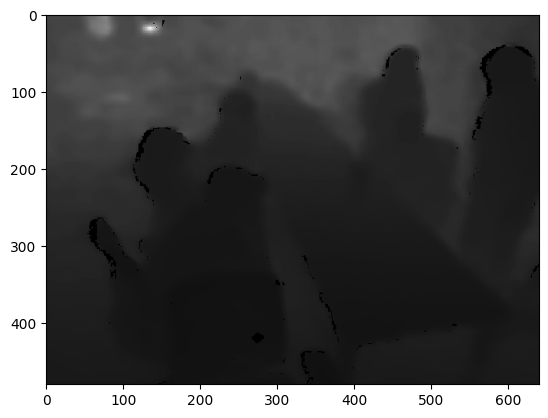

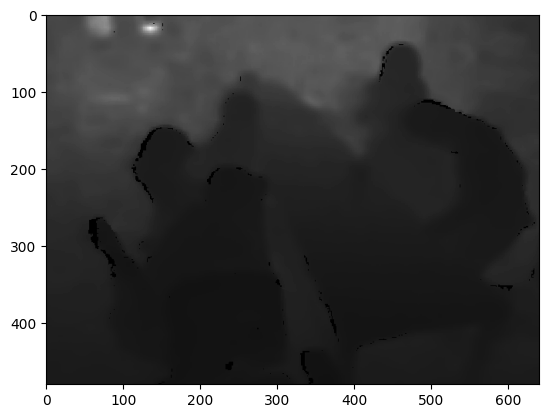

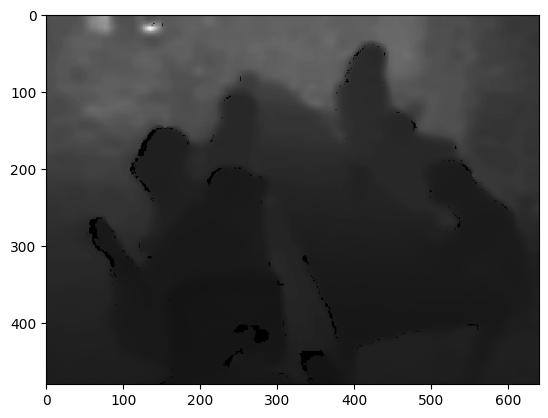

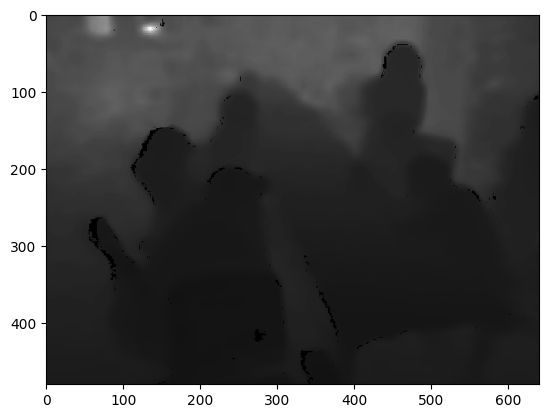

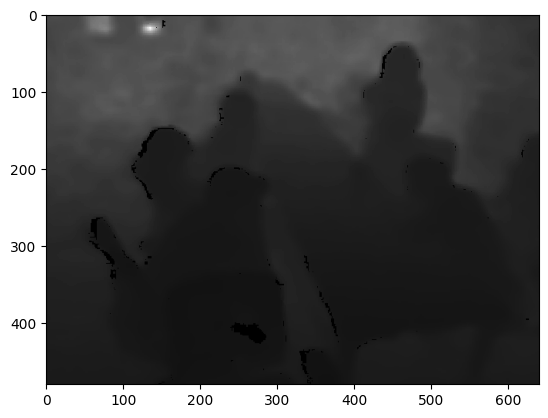

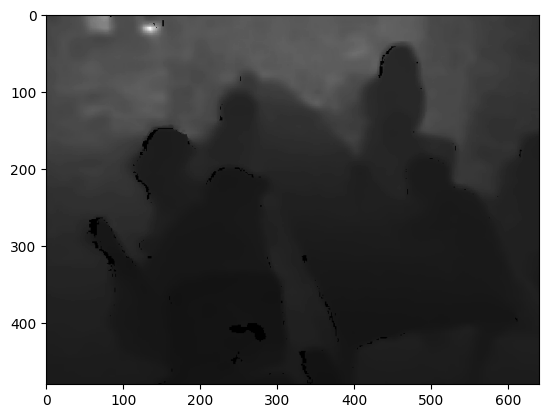

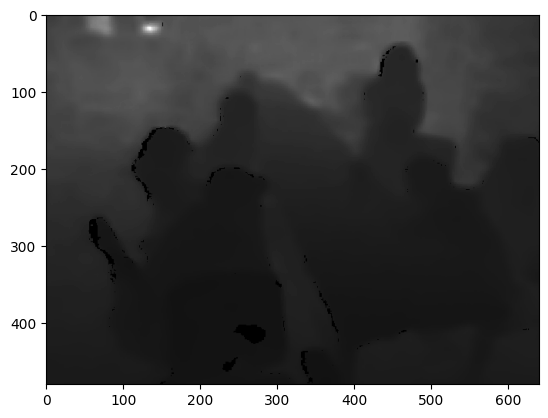

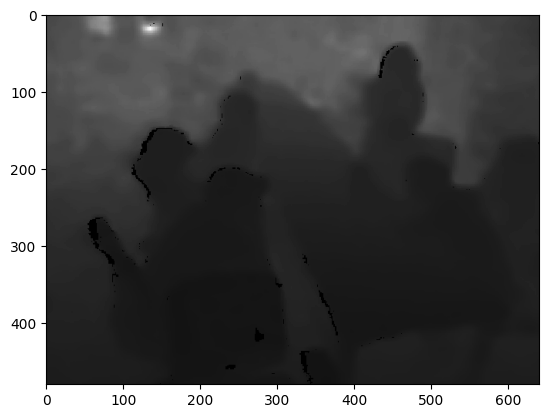

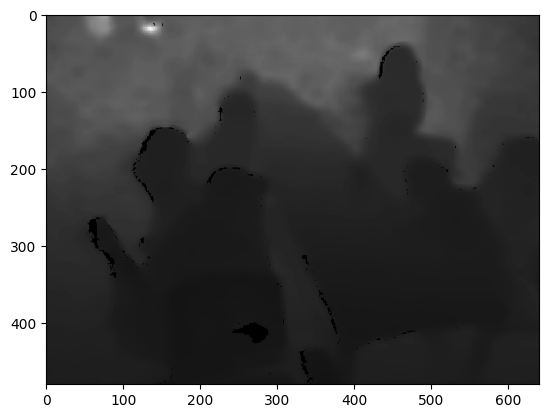

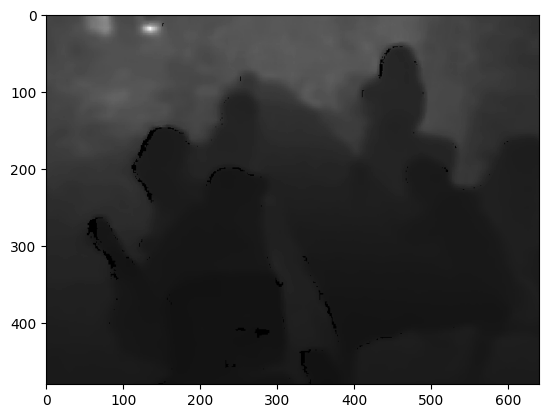

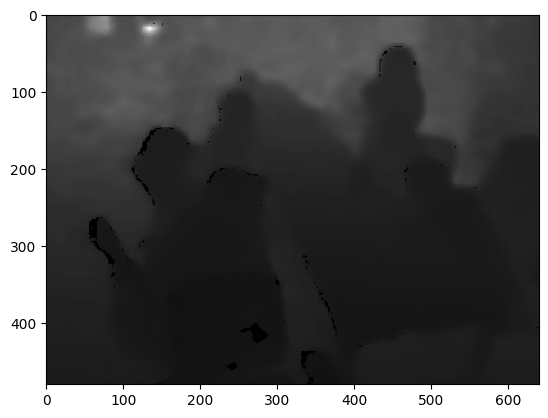

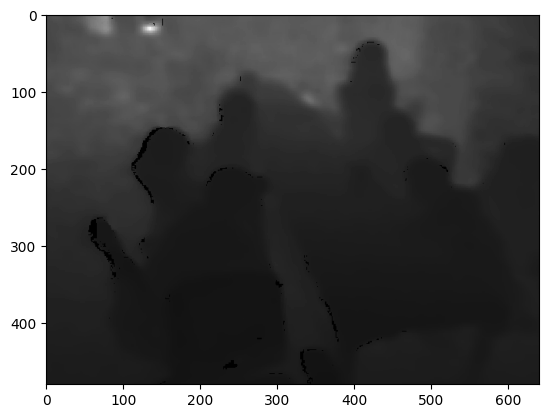

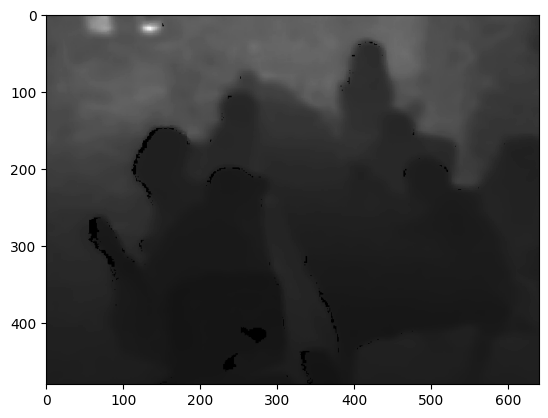

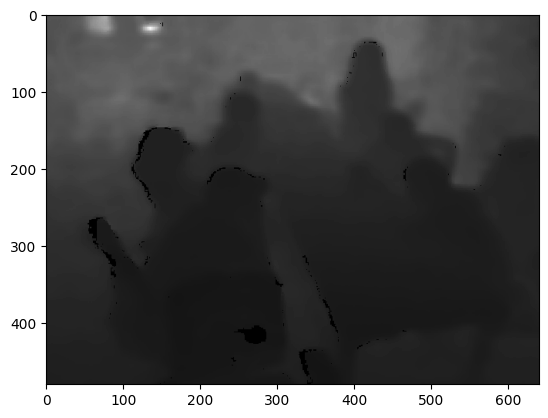

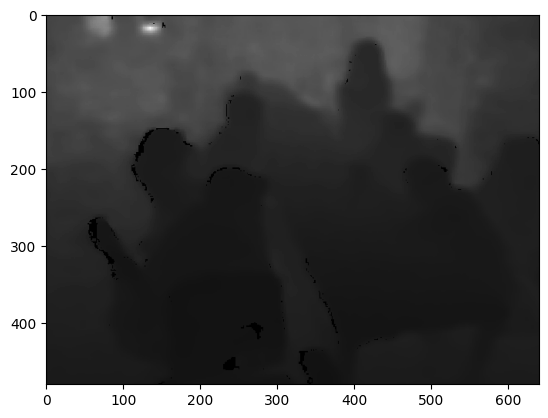

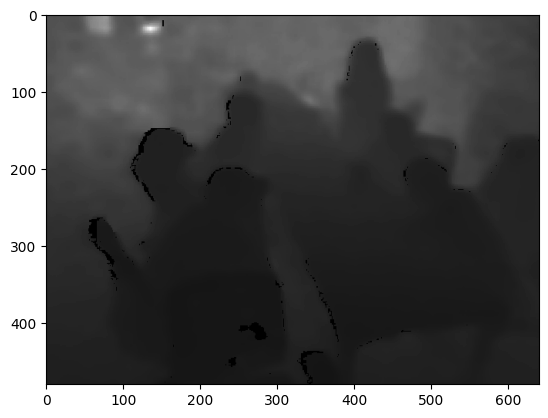

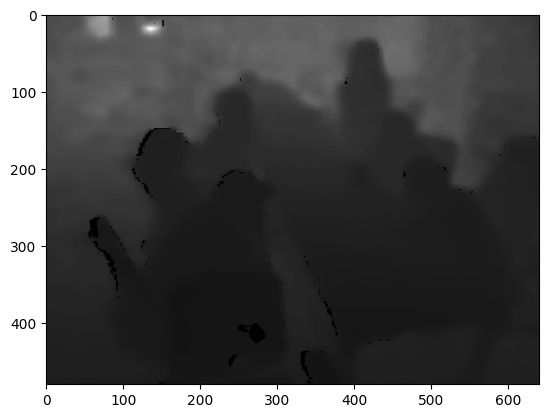

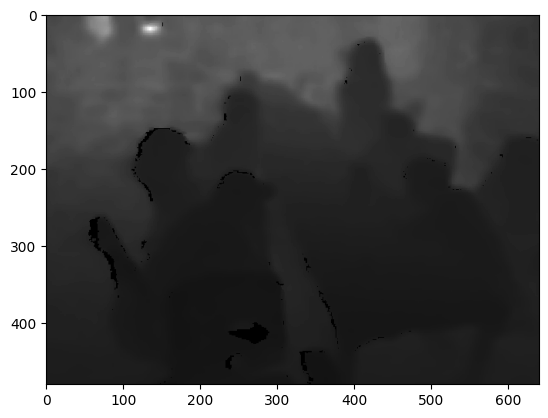

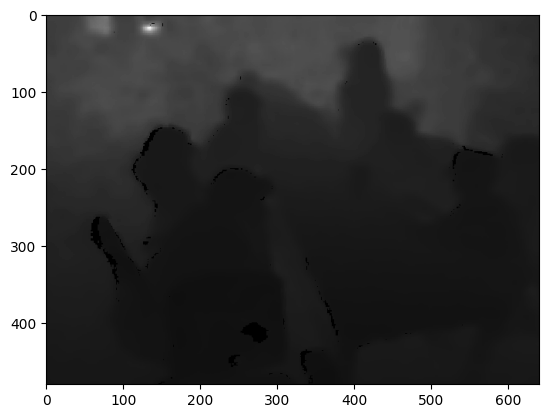

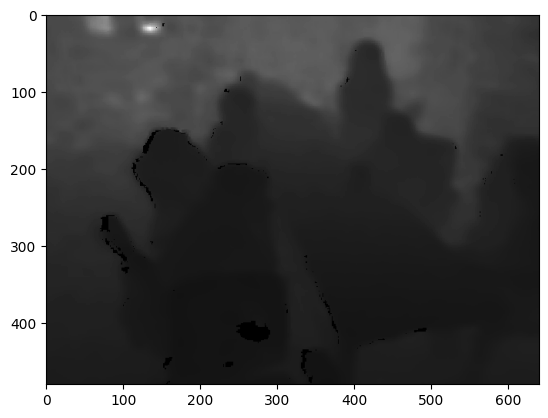

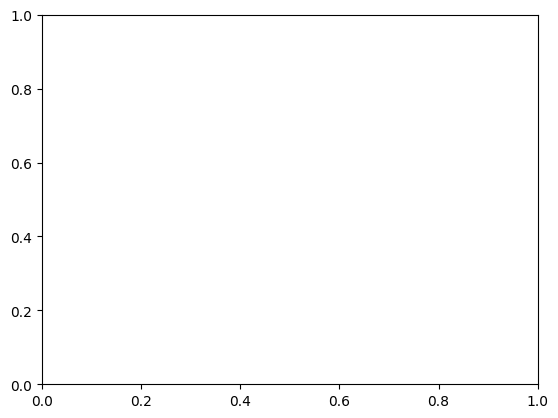

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Assuming the npz files are named as 'depth_image_1.npz', 'depth_image_2.npz', etc.

depth_paths = sorted([f for f in os.listdir("../figma_pres_imgs/exp2/depth")])

depth_images = []
# Read the npz files and store the depth images in a list
for path in depth_paths:
    file_path = os.path.join("../figma_pres_imgs/exp2/depth", path)
    with np.load(file_path) as data:
        depth_image = data['arr_0']  # Assuming the array is stored with the default key 'arr_0'
        min_value = depth_image.min()
        max_value = depth_image.max()
        normalized_array = ((depth_image - min_value) / (max_value - min_value)) * 255
        normalized_array_int = normalized_array.astype(np.uint8)

        depth_images.append(normalized_array_int)
        plt.imshow(normalized_array_int, cmap='gray')
        plt.show()


# Plotting the depth images as a video
fig, ax = plt.subplots()

def update(frame):
    ax.clear()
    ax.imshow(depth_images[frame], cmap='gray')
    ax.set_title(f'Depth Image {frame + 1}')

ani = animation.FuncAnimation(fig, update, frames=60, interval=200)

plt.show()